### <font color='red'>Clustering </font>
 ***Es un algoritmo de i.a no supervisado ya que este a traves de una base de datos divide los datos en grupos o clusters, como no se otorga una respuesta anticipadamente lo consideramos del tipo no supervisado***<br><br>
 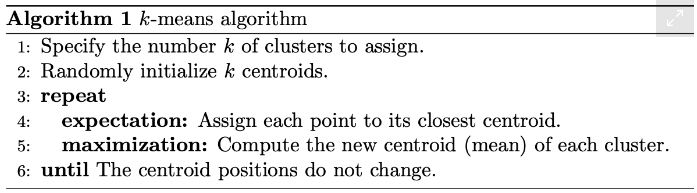 <br>
 *The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.* <br><br>
 En resumen: El algoritmo es un bucle de n iteraciones en el que se elige los centro de los clusters aleatoariamente y se calcula su *distancia a estos* (error) , dentro de cada iteracion se determina nuevamente los centros de los clusters
 
 
**Ejemplo:** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/dataset.csv", sep = ';')
#X = df[["Age","Income"]].to_numpy()
#X
df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/clase1/datos3.csv",sep=';')

# IMPORTANTE: La lectura de datos en este caso era exponencial para poder pasarla a numeros en numpy necesitamos pasar la E a e
# y la , tiene que ser un .
dfTransformed= df.replace('E','e', regex = True).replace(',','.', regex = True)
X = dfTransformed.to_numpy().astype(float)
X

array([[39000000., 15700000.],
       [39700000., 32800000.],
       [30600000.,  1690000.],
       ...,
       [91700000., 79100000.],
       [90400000., 68000000.],
       [64300000., 71500000.]])

In [10]:
def distance(x1,x2):
            return np.sqrt(np.sum(x1-x2)**2)

class Clustering:
    def __init__(self, K , iter = 30000):
        self.K = K
        self.iter = iter
        #Inicializamos los clusters random, en una lista de listas vacia donde almacenaremos los indices
        self.clusters = [[] for i in range(K)]
        #Lista de vectores donde almacenaremos la media.
        self.centroids = [[] for i in range(K)]
    
    def kMeans(self,X):
        self.X = X
        #destructuring de la info pasada como parametro
        #Inicializaciones
        self.n_samples, self.n_features = X.shape
        random_ids = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = np.stack([self.X[i]  for i in random_ids])
        for i in range(self.iter):
            
            # 1) calculamos la distancia de cada punto a los clusters y vemos a cual pertenece.
            # Los cluster van a ser una lista de array con el indice del punto que pertenece a ese cluster.
            
            self.clusters = self.createClusters(self.centroids , self.K)
    
            # 2) calculamos la media de los clusters , que van a ser los nuestros centros
            old_centroids = self.centroids
            self.centroids = self.calculateMeans()
            old_clusters = self.clusters
            self.clusters = self.createClusters(self.centroids, self.K)
                                                
            # 3)Comparo ambos clusters y verifico si son los mismos, si son los mismos significa que convergio y si no repito
            convergio = self.converged(old_clusters, self.clusters)
            if convergio: 
                break
        for index, points in enumerate(self.clusters):
            point = self.X[points].T
            plt.scatter(*point)
            
        plt.scatter(self.centroids[:,0], self.centroids[:,1], color = 'black')
                                    
    # 4) Aca puedo volver a elegir unos puntos random y verificar la desviacion de varios clusters y me quedo con el de menos desviacion
    # FALTA HACER ESTO
        
        
    
    # Creo clusters calculo el cluster correspondiente para cada punto
    def createClusters(self,points, K):
        clusters = [[] for i in range(K)]
        for id, point in enumerate(X):
            index_cluster = self.calculateNearestCluster(point)
            clusters[index_cluster].append(id)
        return clusters
                

    # Calculo la distancia de cada punto hacia los tres clusters
    # Me quedo con la menor   
    def calculateNearestCluster(self,point):
        min = 9999999
        distances = [ [distance(point, self.centroids[i])] for i in range(self.K)]
        index_min_distance = np.argmin(distances)
        return index_min_distance
    
    #Calculo la media de los clusters
    #Uso el indice de los clusters
    def calculateMeans(self):
        means = [[] for i in range(self.K)]
        #Esto esta clave porque le puedo pasar el array de indices a
        # Al array de datos, y me devuelve esos datos en un array
        
        for index,point in enumerate(self.clusters):
            datos = self.X[point]
            # El axis = 0 es para que haga la media de cada columna nashe
            means[index] = np.mean(datos, axis = 0)
        return np.stack(means)
    
    def converged(self, old_clusters, new_clusters):
        for i in range(self.K):
            suma1 = sum(old_clusters[i])
            suma2 = sum(new_clusters[i])
            if ( (suma1 - suma2) != 0):
                return False
        return True
                

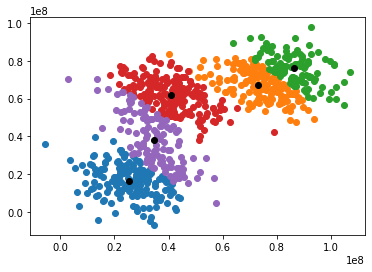

In [11]:
clustering = Clustering(5)
clustering.kMeans(X)

Aclaracion: Para esta conjunto de datos se nota la diferencia en la escala y , que es mucho mas grande que la de x